In [1]:
# Original Jupyter Notebook by David Koes

In [2]:
import numpy as np
import pandas as pd
from scipy import stats

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
flexlig = pd.read_csv('data/crossdocking-flex/cd-carlos-CNNrescore-e8-d3.5-LIG.csv')
flexrec = pd.read_csv('data/crossdocking-flex/cd-carlos-CNNrescore-e8-d3.5-FLEX.csv')

In [5]:
flex = flexlig.merge(flexrec, how='inner', on=['rec','lig', "tag", "pocket"], suffixes=['_lig','_rec'])
flex.head()

,tag,molids_lig,rmsd_lig,cnnscore,cnnaffinity,minimizedAffinity,pocket,rec,lig,molids_rec,rmsd_rec
0,RMSD,3EML_ZMA_A_401:3EML_ZMA_A_401,6.98059,0.842898,7.073944,-10.30702,AA2AR/PDB_Structures/,3QAK,3EML,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...,1.38707
1,RMSD,3EML_ZMA_A_401:3EML_ZMA_A_401,6.98059,0.842898,7.073944,-10.30702,AA2AR/PDB_Structures/,3QAK,3EML,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...,1.52698
2,RMSD,3EML_ZMA_A_401:3EML_ZMA_A_401,6.98059,0.842898,7.073944,-10.30702,AA2AR/PDB_Structures/,3QAK,3EML,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...,1.41695
3,RMSD,3EML_ZMA_A_401:3EML_ZMA_A_401,6.98059,0.842898,7.073944,-10.30702,AA2AR/PDB_Structures/,3QAK,3EML,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...,1.60430
4,RMSD,3EML_ZMA_A_401:3EML_ZMA_A_401,6.98059,0.842898,7.073944,-10.30702,AA2AR/PDB_Structures/,3QAK,3EML,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...,1.41815


In [6]:
rigid= pd.read_csv('data/crossdocking-flex/final_def_ensemble_rescore_defaults.csv')
rigid.head()

,tag,molids,rmsd,cnnscore,cnnaffinity,minimizedAffinity,pocket,rec,lig
0,defaults,3QAK_UKA_A_1200:3QAK_UKA_A_1200,12.1102,0.301147,7.290389,-10.66544,AA2AR/PDB_Structures/,carlos_cd/AA2AR/PDB_Structures/3EML,3QAK
1,defaults,3QAK_UKA_A_1200:3QAK_UKA_A_1200,12.5065,0.208695,0.537906,-9.09964,AA2AR/PDB_Structures/,carlos_cd/AA2AR/PDB_Structures/3EML,3QAK
2,defaults,3QAK_UKA_A_1200:3QAK_UKA_A_1200,13.1839,0.184682,6.905550,-10.15615,AA2AR/PDB_Structures/,carlos_cd/AA2AR/PDB_Structures/3EML,3QAK
3,defaults,3QAK_UKA_A_1200:3QAK_UKA_A_1200,12.5477,0.182141,0.102756,-8.79749,AA2AR/PDB_Structures/,carlos_cd/AA2AR/PDB_Structures/3EML,3QAK
4,defaults,3QAK_UKA_A_1200:3QAK_UKA_A_1200,10.7771,0.176975,6.870663,-10.63542,AA2AR/PDB_Structures/,carlos_cd/AA2AR/PDB_Structures/3EML,3QAK


In [7]:
bestrigid = rigid.loc[rigid .groupby(['rec','lig'])['cnnscore'].idxmax()]
bestrigid.rec = bestrigid.rec.str.slice(-4) # Remove path from rec name
bestrigid.pocket = bestrigid.pocket.str.replace("/PDB_Structures/", "") # Remove path from rec name

In [8]:
bestrigid

,tag,molids,rmsd,cnnscore,cnnaffinity,minimizedAffinity,pocket,rec,lig
0,defaults,3QAK_UKA_A_1200:3QAK_UKA_A_1200,12.110200,0.301147,7.290389,-10.66544,AA2AR,3EML,3QAK
9,defaults,3EML_ZMA_A_401:3EML_ZMA_A_401,3.511560,0.775387,6.286792,-7.76607,AA2AR,3QAK,3EML
432,defaults,3QRK_9DP_A_1:3QRK_9DP_A_1,3.230030,0.661060,7.382404,-9.48162,ABL1,1FPU,3QRK
585,defaults,2G2H_P16_A_532:2G2H_P16_A_532,0.710087,0.970575,7.916739,-12.16370,ABL1,1M52,2G2H
594,defaults,2HZ0_GIN_A_600:2HZ0_GIN_A_600,9.024260,0.357320,6.816514,-5.75695,ABL1,1M52,2HZ0
...,...,...,...,...,...,...,...,...,...
72934,defaults,5C3K_4XF_A_402:5C3K_4XF_A_402,2.486650,0.874397,4.090534,-5.45703,XIAP,5C83,5C3K
72916,defaults,5C7B_4YD_A_402:5C7B_4YD_A_402,0.519649,0.978604,4.812302,-5.93158,XIAP,5C83,5C7B
72628,defaults,1TFQ_998_A_998:1TFQ_998_A_998,2.134850,0.863487,6.242243,-6.36191,XIAP,5C84,1TFQ
72610,defaults,4HY0_1AQ_A_403:4HY0_1AQ_A_403,1.747420,0.708202,6.607816,-5.83707,XIAP,5C84,4HY0


In [9]:
bestflex = flex.loc[flex.groupby(['rec','lig'])['cnnscore'].idxmax()]
bestflex.pocket = bestflex.pocket.str.replace("/PDB_Structures/", "") # Remove path from rec name

In [10]:
bestflex

,tag,molids_lig,rmsd_lig,cnnscore,cnnaffinity,minimizedAffinity,pocket,rec,lig,molids_rec,rmsd_rec
758398,RMSD,2BM2_PM2_A_3211:2BM2_PM2_A_3211,9.97324,0.844044,6.477723,-8.24964,TRYB1,1A0L,2BM2,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/TRYB1/P...,2.105340
754398,RMSD,2FS8_C3A_A_999:2FS8_C3A_A_999,5.96008,0.710734,7.047270,-8.51859,TRYB1,1A0L,2FS8,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/TRYB1/P...,2.209090
753998,RMSD,2FS9_C4A_A_999:2FS9_C4A_A_999,6.09921,0.716898,6.308069,-6.77750,TRYB1,1A0L,2FS9,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/TRYB1/P...,2.115250
753498,RMSD,2FWW_C1R_A_999:2FWW_C1R_A_999,1.47165,0.934818,4.889133,-4.90269,TRYB1,1A0L,2FWW,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/TRYB1/P...,2.166480
758798,RMSD,2GDD_5AM_A_999:2GDD_5AM_A_999,7.32848,0.865685,7.190760,-7.46226,TRYB1,1A0L,2GDD,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/TRYB1/P...,2.144200
...,...,...,...,...,...,...,...,...,...,...,...
656466,RMSD,1GFZ_CFF_A_940:1GFZ_CFF_A_940,3.77464,0.943478,4.039353,-6.61969,PYGM,8GPB,1GFZ,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/PYGM/PD...,0.745710
657366,RMSD,3BCR_AZZ_A_940:3BCR_AZZ_A_940,4.71739,0.768314,5.049916,-8.20208,PYGM,8GPB,3BCR,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/PYGM/PD...,0.748123
657466,RMSD,3BD7_CKB_A_940:3BD7_CKB_A_940,5.51334,0.861324,4.201993,-9.08778,PYGM,8GPB,3BD7,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/PYGM/PD...,0.756820
656766,RMSD,3BDA_C4B_A_940:3BDA_C4B_A_940,4.75390,0.510179,3.681571,-6.31240,PYGM,8GPB,3BDA,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/PYGM/PD...,1.920210


In [11]:
combined = bestrigid.merge(bestflex, how='inner', on=['rec','lig'], suffixes=['_rigid','_flex'])

In [12]:
combined

,tag_rigid,molids,rmsd,cnnscore_rigid,cnnaffinity_rigid,minimizedAffinity_rigid,pocket_rigid,rec,lig,tag_flex,molids_lig,rmsd_lig,cnnscore_flex,cnnaffinity_flex,minimizedAffinity_flex,pocket_flex,molids_rec,rmsd_rec
0,defaults,3QAK_UKA_A_1200:3QAK_UKA_A_1200,12.110200,0.301147,7.290389,-10.66544,AA2AR,3EML,3QAK,RMSD,3QAK_UKA_A_1200:3QAK_UKA_A_1200,7.61065,0.592328,8.179861,-12.93476,AA2AR,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...,1.524460
1,defaults,3EML_ZMA_A_401:3EML_ZMA_A_401,3.511560,0.775387,6.286792,-7.76607,AA2AR,3QAK,3EML,RMSD,3EML_ZMA_A_401:3EML_ZMA_A_401,6.98059,0.842898,7.073944,-10.30702,AA2AR,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...,1.387070
2,defaults,3QRK_9DP_A_1:3QRK_9DP_A_1,3.230030,0.661060,7.382404,-9.48162,ABL1,1FPU,3QRK,RMSD,3QRK_9DP_A_1:3QRK_9DP_A_1,1.24260,0.915478,7.829613,-11.98200,ABL1,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/ABL1/PD...,1.068650
3,defaults,2G2H_P16_A_532:2G2H_P16_A_532,0.710087,0.970575,7.916739,-12.16370,ABL1,1M52,2G2H,RMSD,2G2H_P16_A_532:2G2H_P16_A_532,2.00750,0.971164,7.855288,-12.25662,ABL1,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/ABL1/PD...,1.463120
4,defaults,2HZ0_GIN_A_600:2HZ0_GIN_A_600,9.024260,0.357320,6.816514,-5.75695,ABL1,1M52,2HZ0,RMSD,2HZ0_GIN_A_600:2HZ0_GIN_A_600,7.35483,0.415456,6.609828,-10.69355,ABL1,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/ABL1/PD...,2.147050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8100,defaults,5C3K_4XF_A_402:5C3K_4XF_A_402,2.486650,0.874397,4.090534,-5.45703,XIAP,5C83,5C3K,RMSD,5C3K_4XF_A_402:5C3K_4XF_A_402,2.61081,0.903329,4.070414,-6.04773,XIAP,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...,1.728150
8101,defaults,5C7B_4YD_A_402:5C7B_4YD_A_402,0.519649,0.978604,4.812302,-5.93158,XIAP,5C83,5C7B,RMSD,5C7B_4YD_A_402:5C7B_4YD_A_402,2.13232,0.949809,4.438191,-5.57468,XIAP,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...,1.439140
8102,defaults,1TFQ_998_A_998:1TFQ_998_A_998,2.134850,0.863487,6.242243,-6.36191,XIAP,5C84,1TFQ,RMSD,1TFQ_998_A_998:1TFQ_998_A_998,3.42807,0.659617,5.623848,-5.57881,XIAP,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...,1.548130
8103,defaults,4HY0_1AQ_A_403:4HY0_1AQ_A_403,1.747420,0.708202,6.607816,-5.83707,XIAP,5C84,4HY0,RMSD,4HY0_1AQ_A_403:4HY0_1AQ_A_403,2.69865,0.931994,6.814124,-6.82738,XIAP,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...,0.964697


In [13]:
combined = combined.replace([np.inf, -np.inf], np.nan)

In [14]:
combined.rmsd.isnull().sum()

0

In [15]:
combined.rmsd_lig.isnull().sum()

0

In [16]:
combined.rmsd_rec.isnull().sum()

9

In [17]:
combined.loc[combined.rmsd_rec.isnull()]

,tag_rigid,molids,rmsd,cnnscore_rigid,cnnaffinity_rigid,minimizedAffinity_rigid,pocket_rigid,rec,lig,tag_flex,molids_lig,rmsd_lig,cnnscore_flex,cnnaffinity_flex,minimizedAffinity_flex,pocket_flex,molids_rec,rmsd_rec
1500,defaults,5W0C_9W6_A_501:5W0C_9W6_A_501,7.21724,0.553964,5.985719,-4.83973,CP2C9,1R9O,5W0C,RMSD,5W0C_9W6_A_501:5W0C_9W6_A_501,5.36476,0.693793,5.735137,15.10261,CP2C9,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/CP2C9/P...,NaN
2182,defaults,2RA0_JNJ_A_1:2RA0_JNJ_A_1,1.37178,0.967965,8.057706,-10.81533,FA10,1IQE,2RA0,RMSD,2RA0_JNJ_A_1:2RA0_JNJ_A_1,1.12631,0.896387,7.822534,-11.61374,FA10,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/FA10/PD...,NaN
2183,defaults,3KQB_LGJ_A_301:3KQB_LGJ_A_301,1.55122,0.783398,7.703771,-12.79677,FA10,1IQE,3KQB,RMSD,3KQB_LGJ_A_301:3KQB_LGJ_A_301,1.73781,0.691087,7.547536,-13.28600,FA10,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/FA10/PD...,NaN
2235,defaults,2FZZ_5QC_A_1:2FZZ_5QC_A_1,1.08023,0.984034,8.201651,-13.34424,FA10,2XBV,2FZZ,RMSD,2FZZ_5QC_A_1:2FZZ_5QC_A_1,1.43551,0.969914,8.272442,-14.51439,FA10,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/FA10/PD...,NaN
2236,defaults,2Y82_930_A_1245:2Y82_930_A_1245,2.63931,0.554174,6.928076,-8.77764,FA10,2XBV,2Y82,RMSD,2Y82_930_A_1245:2Y82_930_A_1245,3.67225,0.852857,7.117783,-9.23860,FA10,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/FA10/PD...,NaN
4247,defaults,1X88_NAT_A_801:1X88_NAT_A_801,6.25193,0.556522,3.981334,-5.19176,KIF11,4BXN,1X88,RMSD,1X88_NAT_A_801:1X88_NAT_A_801,4.19534,0.778364,5.871177,-7.96047,KIF11,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/KIF11/P...,NaN
4248,defaults,2IEH_MOY_A_602:2IEH_MOY_A_602,6.39565,0.643247,4.505963,-7.19696,KIF11,4BXN,2IEH,RMSD,2IEH_MOY_A_602:2IEH_MOY_A_602,5.32995,0.661507,6.043282,-8.78048,KIF11,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/KIF11/P...,NaN
4249,defaults,2X7D_EGB_A_1369:2X7D_EGB_A_1369,6.26609,0.591287,4.267475,-5.67960,KIF11,4BXN,2X7D,RMSD,2X7D_EGB_A_1369:2X7D_EGB_A_1369,6.35282,0.746082,5.839588,-10.29091,KIF11,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/KIF11/P...,NaN
4250,defaults,3K3B_L31_A_371:3K3B_L31_A_371,9.09487,0.638428,4.833274,-4.51328,KIF11,4BXN,3K3B,RMSD,3K3B_L31_A_371:3K3B_L31_A_371,2.29230,0.693233,6.314242,-11.55596,KIF11,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/KIF11/P...,NaN


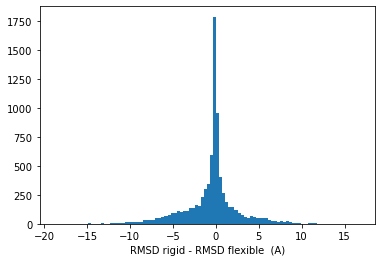

In [18]:
combined['rmsdiff'] = combined.rmsd - combined.rmsd_lig
plt.hist(combined.rmsdiff, bins=100);
plt.xlabel("RMSD rigid - RMSD flexible  (A)")
plt.savefig("figures/crossdocking-flex/rmsd-diff_hist.pdf")

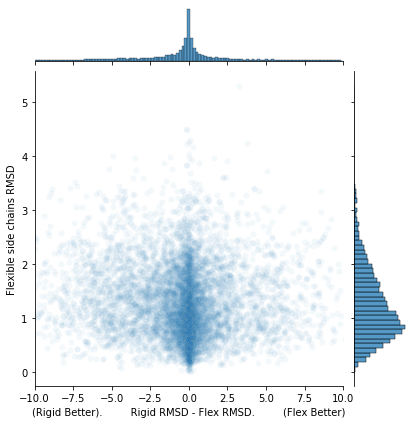

In [19]:
D = combined.replace([np.inf, -np.inf], np.nan).dropna()

h = sns.jointplot(data=D, x='rmsdiff', y='rmsd_rec', xlim=(-10,10), alpha=.05)
h.ax_joint.set_xlabel('(Rigid Better).         Rigid RMSD - Flex RMSD.         (Flex Better)')
h.ax_joint.set_ylabel('Flexible side chains RMSD')
plt.savefig("figures/crossdocking-flex/rmsd-diff_vs_side-chain-rmsd.pdf")

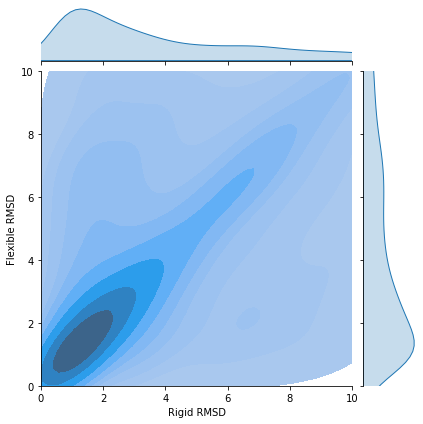

In [20]:
h = sns.jointplot(data=D, x='rmsd',y='rmsd_lig',kind='kde',ylim=(0,10),xlim=(0,10), fill=True)
h.ax_joint.set_xlabel('Rigid RMSD')
h.ax_joint.set_ylabel('Flexible RMSD')
plt.savefig("figures/crossdocking-flex/rmsd-flex_vs_rmsd-rigid_corr.pdf")

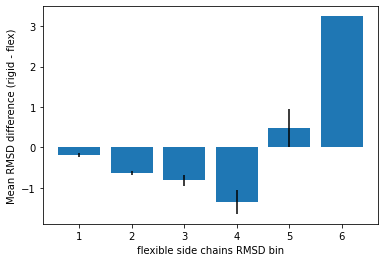

In [21]:
cuts = pd.cut(D.rmsd_rec, range(0,10,1))
C = D.groupby([cuts])
plt.bar(list(range(1,10,1)),C.mean().rmsdiff.values,yerr=C.sem().rmsdiff)
plt.xlabel('flexible side chains RMSD bin')
plt.ylabel('Mean RMSD difference (rigid - flex)')
plt.savefig("figures/crossdocking-flex/mean-diff-rmsd_vs_flex-rmsd-bin_hist.pdf")